In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

from sympy import Symbol, Point2D
from matplotlib.animation import FuncAnimation, PillowWriter

In [2]:
x = Symbol('x')
t = Symbol('t')
x = 1 / 2 * t

In [3]:
a_t_max = 10
a_n_max = 6
v_max = 1.5

x_min = 0
x_max = 4

A = 1
O_m = 3
theta_0 = 0.2

steps = 200
t_start = 0
t_end = 6
dt = (t_end - t_start) / steps

In [4]:
y_x = A * sp.sin(O_m * x + theta_0)

In [5]:
def car(frame, pos):
    t_a = 0.2
    X, Y = 0, 0
    V = a_t = at_t = an_t = 0
    if frame < t_a:
        a1 = 0
        a2 = 0
        a3 = v_max / (2 * t_a)

        tau = Point2D(sp.diff(x), sp.diff(y_x))
        tau = tau / sp.sqrt(np.dot(tau, tau))

        V_t = 2 * a3 * t * tau
        V = 2 * a3 * frame * tau

        a_t = sp.diff(V_t[0]).subs(t, frame), sp.diff(V_t[1]).subs(t, frame)
        at_t = np.dot(a_t, tau.subs(t, 2 * pos[0])) * tau.subs(t, 2 * pos[0])
        an_t = list(np.array(a_t) - np.array(at_t))

        if (2 * a3 * frame)**2 < 0.000001:
            a_t = [0, 0]
            at_t = [0, 0]
            an_t = [0, 0]
    
    elif frame > t_end - t_a:
        a1 = 0
        a2 = v_max * t_end / t_a
        a3 = -v_max / (2 * t_a)

        tau = Point2D(sp.diff(x), sp.diff(y_x))
        tau = tau / sp.sqrt(np.dot(tau, tau))

        V_t = (a2 + 2 * a3 * t) * tau
        V = (a2 + 2 * a3 * frame) * tau

        a_t = sp.diff(V_t[0]).subs(t, frame), sp.diff(V_t[1]).subs(t, frame)
        at_t = np.dot(a_t, tau.subs(t, 2 * pos[0])) * tau.subs(t, 2 * pos[0])
        an_t = list(np.array(a_t) - np.array(at_t))

        if (a2 + 2 * a3 * frame)**2 < 0.000001:
            a_t = [0, 0]
            at_t = [0, 0]
            an_t = [0, 0]

    else:
        tau = Point2D(sp.diff(x), sp.diff(y_x))
        tau = tau / sp.sqrt(np.dot(tau, tau))

        V_t = v_max * tau
        V = v_max * tau

        a_t = sp.diff(V_t[0]).subs(t, frame), sp.diff(V_t[1]).subs(t, frame)
        at_t = np.dot(a_t, tau.subs(t, 2 * pos[0])) * tau.subs(t, 2 * pos[0])
        an_t = list(np.array(a_t) - np.array(at_t))

    try:
        V = [V[0].subs(t, 2  * pos[0]).evalf(), V[1].subs(t, 2  * pos[0]).evalf()]
    except:
        pass

    try:
        a_t = [a_t[0].subs(t, 2  * pos[0]).evalf(), a_t[1].subs(t, 2  * pos[0]).evalf()]
    except:
        pass

    try:
        at_t = [a_t[0].subs(t, 2  * pos[0]).evalf(), at_t[1].subs(t, 2  * pos[0]).evalf()]
    except:
        pass

    try:
        an_t = [a_t[0].subs(t, 2  * pos[0]).evalf(), an_t[1].subs(t, 2  * pos[0]).evalf()]
    except:
        pass
    
    #print(V, a_t, at_t, an_t)
    
    return [V, a_t, at_t, an_t]

In [6]:
for p, color in zip(car(0.1, [0, 0]), ['a', 'b', 'c', 'd']):
    print(p, color)

[0.241498937834477, 0.710055112667192] a
[2.63009641257737, 7.02490878028235] b
[2.63009641257737, 7.09832677394313] c
[2.63009641257737, -0.0734179936607816] d


KeyboardInterrupt: 

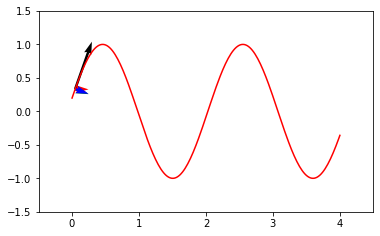

In [7]:
fig, ax = plt.subplots()
ax.set_aspect("equal")
xdata, ydata = [], []
ln, = plt.plot([], [], 'r-')

vecs = []
lines = []

car_pos = [float(x.subs(t, t_start).evalf()), float(y_x.subs(t, t_start).evalf())]

def fill_path():
    for frame in np.linspace(x_min, x_max, steps):
        xdata.append(x.subs(t, 2 * frame))
        ydata.append(y_x.subs(t, 2 * frame))

    ln.set_data(xdata, ydata)

fill_path()

def init_task1():
    ax.set_xlim(-0.5, 4.5)
    ax.set_ylim(-1.5, 1.5)
    return ln,

def update_task1(frame):

    [V_frame, a_frame, at_frame, an_frame] = car(frame, car_pos)
    
    V_frame = [float(V_frame[0]), float(V_frame[1])]
    a_frame = [float(a_frame[0]), float(a_frame[1])]
    at_frame = [float(at_frame[0]), float(at_frame[1])]
    an_frame = [float(an_frame[0]), float(an_frame[1])]

    while len(vecs):
        vecs[-1].remove()
        vecs.pop()

    while len(lines):
        lines[-1][0].remove()
        lines.pop()
 
    vecs.extend([
        plt.quiver(car_pos[0], car_pos[1], float(i[0]), float(i[1]), color=color, scale=2, units='xy', scale_units='xy', angles='xy')
        for i, color in zip([V_frame, a_frame, at_frame, an_frame], ['black', 'green', 'red', 'blue'])
    ])
    temp = [car_pos[0] + V_frame[0] * dt, car_pos[1] + V_frame[1] * dt]
    car_pos.clear()
    car_pos.extend(temp)
    #lines.append(plt.plot([car_pos[0], car_pos[0] + car_v[0]], [car_pos[1], car_pos[1] + car_v[1]]))

    
    

    ln.set_data(xdata, ydata)
    return ln,

anim = FuncAnimation(fig, update_task1, frames=np.linspace(t_start, t_end, steps), init_func=init_task1, blit=True)

anim.save('sim.gif', dpi=100, writer=PillowWriter(fps=60))
plt.close('all')